# KL Divergence

In this quick tutorial we will learn what is KL divergence and how we can use it.

**问题**

假设你采集到一些样本数据，通过局部数据，你可以观察到一些数据分布规律，但是你想知道它整体的情况，这时候你该怎么做呢？
换成数学概念：整体数据的分布是如何？未知如何求解？
思路： 直接套用常见的分布（均匀分布，高斯分布，对数正态分布，泊松分布，指数分布，二项分布，学生t分布，卡方分布），你将得到8个分布；
问题又来了， 哪个更合适呢？

Kullback-Leibler散度（1951, S. Kullback，R. A. Leibler）就是在这样的情况下，产生了。
一个是随机变量的真实分布（未知的分布），一个是拟合分布（已知的常见分布），通过KL散度，去评估两个分布的拟合程度。

下面就是如何实现KL散度了！

**文章推荐**
- [Kullback-Leibler Divergence Explained](https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained)
  - [中文翻译](https://blog.csdn.net/Code_LT/article/details/131120254)
  - [github](https://github.com/thushv89/exercises_thushv_dot_com/blob/master/kl_divergence.ipynb)

- [机器学习：Kullback-Leibler Divergence （KL 散度）](https://blog.csdn.net/matrix_space/article/details/80550561)
- [关于KL散度（Kullback-Leibler Divergence）的笔记](https://zhuanlan.zhihu.com/p/438129018)
  - 开篇就认识到自己总是忽略连续随机变量的分布
  - KL散度的性质
  - KL散度的直观解析（证明）

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial

## Space Worm Teeth Distribution

Here we plot the teeth distribution of the space worms.

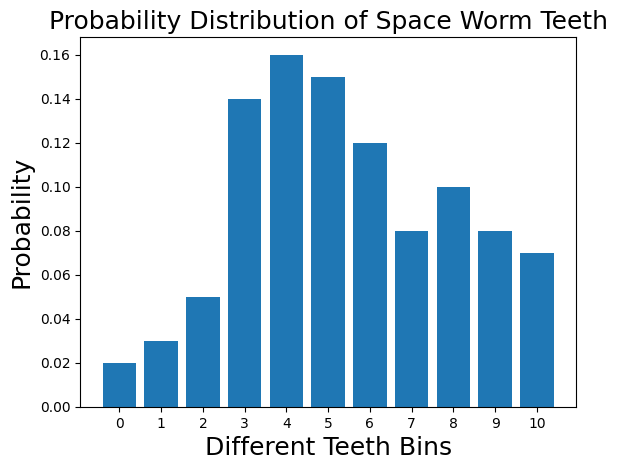

In [6]:
true_data = [0.02, 0.03, 0.05, 0.14, 0.16, 0.15, 0.12, 0.08, 0.1, 0.08, 0.07]
assert sum(true_data)==1.0

plt.bar(np.arange(len(true_data)),true_data)
plt.xlabel('Different Teeth Bins',fontsize=18)
plt.title('Probability Distribution of Space Worm Teeth',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(np.arange(len(true_data)))
plt.show()

## Approximating the True Distribution with a Uniform Distribution

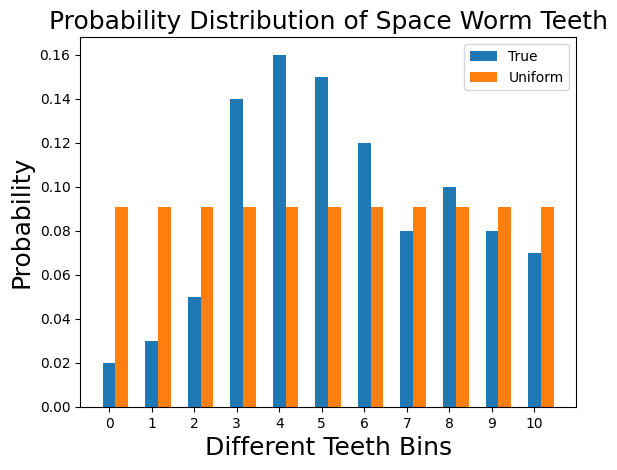

In [8]:
def get_unif_probability(n):
    return 1.0/n

unif_data = [get_unif_probability(11) for _ in range(11)]
width=0.3

plt.bar(np.arange(len(true_data)),true_data,width=width,label='True')
plt.bar(np.arange(len(true_data))+width,unif_data,width=width,label='Uniform')
plt.xlabel('Different Teeth Bins',fontsize=18)
plt.title('Probability Distribution of Space Worm Teeth',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(np.arange(len(true_data)))
plt.legend()
plt.show()

In [ ]:
## Approximating the True dis

Success probability:  0.5439999999999999


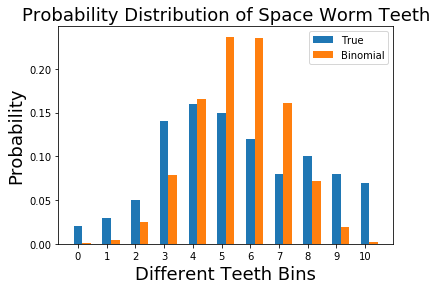

In [75]:
def get_bino_probability(mean,k,n):
    return (factorial(n)/(factorial(k)*factorial(n-k)))*(mean**k)*((1.0-mean)**(n-k))

def get_bino_success(true_data,n):
    return np.sum(np.array(true_data)*np.arange(len(true_data)))/10.0

n_trials = 10
succ = get_bino_success(true_data,n_trials)
print('Success probability: ',succ)

bino_data = [get_bino_probability(succ,k,n_trials) for k in range(11)]

width=0.3

plt.bar(np.arange(len(true_data)),true_data,width=width,label='True')
plt.bar(np.arange(len(true_data))+width,bino_data,width=width,label='Binomial')
plt.xlabel('Different Teeth Bins',fontsize=18)
plt.title('Probability Distribution of Space Worm Teeth',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(np.arange(len(true_data)))
plt.legend()
plt.show()

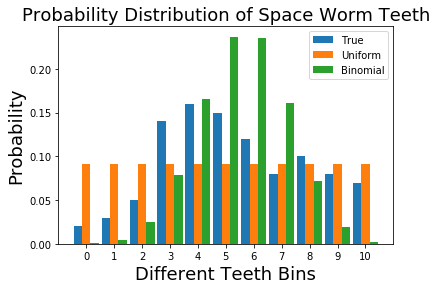

In [76]:
plt.bar(np.arange(len(true_data))-width,true_data,width=width,label='True')
plt.bar(np.arange(len(true_data)),unif_data,width=width,label='Uniform')
plt.bar(np.arange(len(true_data))+width,bino_data,width=width,label='Binomial')
plt.xlabel('Different Teeth Bins',fontsize=18)
plt.title('Probability Distribution of Space Worm Teeth',fontsize=18)
plt.ylabel('Probability',fontsize=18)
plt.xticks(np.arange(len(true_data)))
plt.legend()
plt.show()

In [77]:
def get_klpq_div(p_probs, q_probs):
    kl_div = 0.0
    
    for pi, qi in zip(p_probs, q_probs):
        kl_div += pi*np.log(pi/qi)
    
    return kl_div

def get_klqp_div(p_probs, q_probs):
    kl_div = 0.0
    
    for pi, qi in zip(p_probs, q_probs):
        kl_div += qi*np.log(qi/pi)
    
    return kl_div

print('KL(True||Uniform): ',get_klpq_div(true_data,unif_data))
print('KL(True||Binomial): ',get_klpq_div(true_data,bino_data))



KL(True||Uniform):  0.13667971094966938
KL(True||Binomial):  0.42734972485619327


## Plotting KL-Divergence vs Different Binomial Probabilities

KL divergence at mean-delta:  0.4273698762199394
KL divergence at mean:  0.42734972485619327
KL divergence at mean+delta:  0.42736988575373996


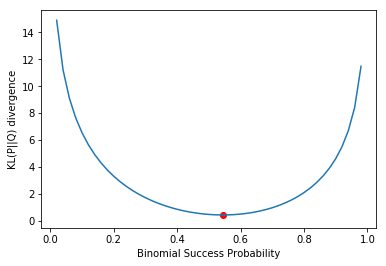

In [79]:
n_trials = 10
succ = get_bino_success(true_data,n_trials)

x = np.arange(0.02,1.0,0.02)

kl_divs = []
for xi in x:
    bino_data = [get_bino_probability(xi, k, n_trials) for k in range(11)]
    kl_divs.append(get_klpq_div(true_data, bino_data))

print('KL divergence at mean-delta: ', get_klpq_div(true_data,[get_bino_probability(succ-0.001, k, n_trials) for k in range(11)]))
print('KL divergence at mean: ', get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))
print('KL divergence at mean+delta: ', get_klpq_div(true_data,[get_bino_probability(succ+0.001, k, n_trials) for k in range(11)]))
plt.plot(x,kl_divs)
# we plot our choice for the binomial success probability on the same curve
plt.scatter(succ,get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]),color='r')
plt.xlabel('Binomial Success Probability')
plt.ylabel('KL(P||Q) divergence')
plt.show()

## KL(P||Q) vs KL(Q||P)

KL(P||Q):  0.42734972485619327
KL(Q||P):  0.2519548471987832


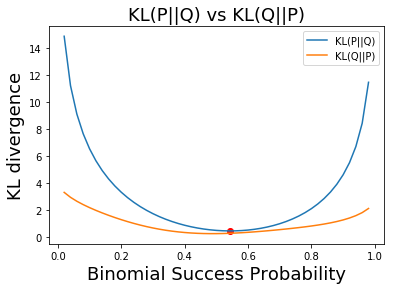

In [97]:
x = np.arange(0.02,1.0,0.02)

klpq_divs,klqp_divs = [],[]
for xi in x:
    bino_data = [get_bino_probability(xi, k, n_trials) for k in range(11)]
    klpq_divs.append(get_klpq_div(true_data, bino_data))
    klqp_divs.append(get_klqp_div(true_data, bino_data))

print('KL(P||Q): ', get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))
print('KL(Q||P): ', get_klqp_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))

plt.plot(x,klpq_divs,label='KL(P||Q)')
plt.plot(x,klqp_divs,label='KL(Q||P)')
plt.scatter(succ,get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]),color='r')
plt.xlabel('Binomial Success Probability',fontsize=18)
plt.ylabel('KL divergence',fontsize=18)
plt.title('KL(P||Q) vs KL(Q||P)',fontsize=18)
plt.legend()
plt.show()

KL(P||Q):  0.42734972485619327
KL(Q||P):  0.2519548471987832


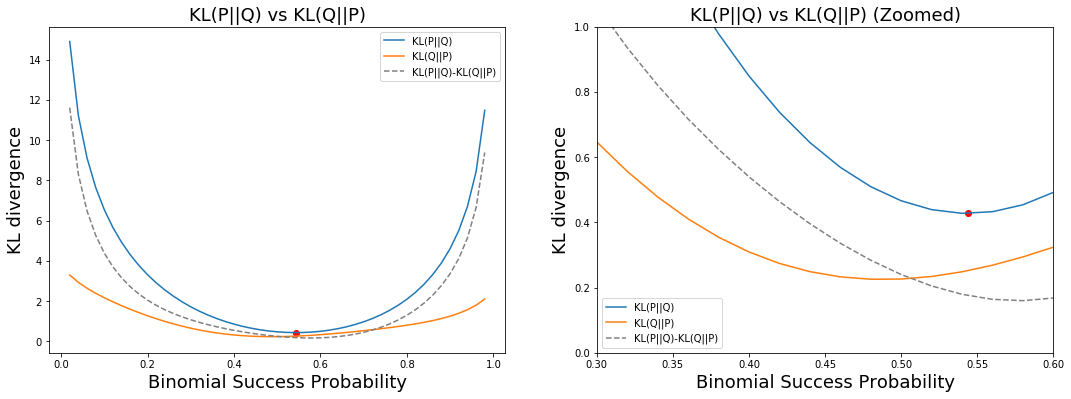

In [94]:
x = np.arange(0.02,1.0,0.02)

klpq_divs,klqp_divs = [],[]
for xi in x:
    bino_data = [get_bino_probability(xi, k, n_trials) for k in range(11)]
    klpq_divs.append(get_klpq_div(true_data, bino_data))
    klqp_divs.append(get_klqp_div(true_data, bino_data))

print('KL(P||Q): ', get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))
print('KL(Q||P): ', get_klqp_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(x,klpq_divs,label='KL(P||Q)')
plt.plot(x,klqp_divs,label='KL(Q||P)')
plt.plot(x,np.array(klpq_divs)-np.array(klqp_divs),linestyle='--',color='gray',label='KL(P||Q)-KL(Q||P)')
plt.scatter(succ,get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]),color='r')
plt.xlabel('Binomial Success Probability',fontsize=18)
plt.ylabel('KL divergence',fontsize=18)
plt.title('KL(P||Q) vs KL(Q||P)',fontsize=18)
plt.legend()

plt.subplot(122)
plt.plot(x,klpq_divs,label='KL(P||Q)')
plt.plot(x,klqp_divs,label='KL(Q||P)')
plt.plot(x,np.array(klpq_divs)-np.array(klqp_divs),linestyle='--',color='gray',label='KL(P||Q)-KL(Q||P)')
plt.scatter(succ,get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]),color='r')
plt.xlabel('Binomial Success Probability',fontsize=18)
plt.ylabel('KL divergence',fontsize=18)
plt.title('KL(P||Q) vs KL(Q||P) (Zoomed)',fontsize=18)
plt.xlim([0.3,0.6])
plt.ylim([0.0,1.0])
plt.legend()

plt.show()